# WHO REPRESENTATIVE SOCIAL MEDIA COMMUNICATIONS PROJECT
### Ketaki Gujar, Mithil Guruvugari

### Setup

In [2]:
# Imports
import requests
import tweepy
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
key = "5g71QMyzmB0aRHXda958SjoQa"
secret_key = "ZxZfun1zU6S1flgYBQGsTlBOQGV64X0VpLy1Gb4twNMwZr9UxI"

In [4]:
access = "350927989-vXESFCEwmnQjGLPvk1XirQEo1QDdXNK3EExkdxDj"
secret_access = "9M7Td4LZvGnFnUxIPJUy1uEnMCxhEtDLgD8D5ayMhLqAF"

In [5]:
# Connecting to API
auth = tweepy.OAuthHandler(key, secret_key)
auth.set_access_token(access, secret_access)
api = tweepy.API(auth, wait_on_rate_limit = False)


### Exploratory Data Analysis

Confirming twitter accounts through API.

In [6]:
# # Returning list of friends (sample)
# for i in tweepy.Cursor(api.followers, screen_name = "WHO", count = 200).items(100):
#   print(i.screen_name)

Importing database of WHO Rep Accounts.

In [8]:
df = pd.read_csv('WHO_Reps_APIData.csv', encoding = 'latin1')
df

,screen_name,Rep,Country,Region
0,DrLiAilan,Dr Ailan Li,Cambodia,WPRO
1,loyingru,Dr Yin-Ru Jacqueline Lo,Lao PDR,WPRO
2,drrabiwho,Dr Rabindra Romauld Abeyasinghe,Malaysia,WPRO
3,diord2003,Dr Sergey Diorditsa,Mongolia,WPRO
4,amaalsen,Ms Anna Alexandra Maalsen,Papua New Guinea,WPRO
...,...,...,...,...
91,hakobyan_tatul,Dr Tatul Hakobyan,Slovakia,EURO
92,BBerdyklychev,Dr Batyr Berdyklychev,Turkey,EURO
93,egor_zaitsev8,Dr Egor Zaitsev,Belarus,EURO
94,HabichtJarno,Dr Jarno Habicht,Ukraine,EURO


In [9]:
# Adding follower and tweets columns to df
followers = []
tweets = []
for name in df['screen_name']:
  user = api.get_user(name)
  followers.append(user.followers_count)
  tweets.append(user.statuses_count)

In [198]:
df['Followers'] = followers
df['Tweets'] = tweets
df['Retweets'] = ""
df['PercentRT'] = ""
df['PercentH'] = ""
df

,screen_name,Rep,Country,Region,Followers,Tweets,Retweets,PercentRT,PercentH
0,DrLiAilan,Dr Ailan Li,Cambodia,WPRO,3460,1332,,,
1,loyingru,Dr Yin-Ru Jacqueline Lo,Lao PDR,WPRO,925,717,,,
2,drrabiwho,Dr Rabindra Romauld Abeyasinghe,Malaysia,WPRO,355,1444,,,
3,diord2003,Dr Sergey Diorditsa,Mongolia,WPRO,112,116,,,
4,amaalsen,Ms Anna Alexandra Maalsen,Papua New Guinea,WPRO,604,370,,,
...,...,...,...,...,...,...,...,...,...
91,hakobyan_tatul,Dr Tatul Hakobyan,Slovakia,EURO,33,8,,,
92,BBerdyklychev,Dr Batyr Berdyklychev,Turkey,EURO,120,9,,,
93,egor_zaitsev8,Dr Egor Zaitsev,Belarus,EURO,3,1,,,
94,HabichtJarno,Dr Jarno Habicht,Ukraine,EURO,584,350,,,


Calculating basic summary statistics for followers and tweets.

In [11]:
# Mean and median followers per rep account
avg_followers = np.mean(df['Followers'])
med_followers = np.median(df['Followers'])

# Mean and median tweets per rep account
avg_tweets = np.mean(df['Tweets'])
med_tweets = np.median(df['Tweets'])

# Output
print("Mean number of followers:", avg_followers, ", Median number of followers:", med_followers)
print("Mean number of tweets:", avg_tweets, ", Median number of tweets:", med_tweets)


Mean number of followers: 494.09375 , Median number of followers: 177.5
Mean number of tweets: 1016.4375 , Median number of tweets: 196.5


In [12]:
# More summary statistics
df['Followers'].describe()

count      96.000000
mean      494.093750
std       773.902484
min         0.000000
25%        39.750000
50%       177.500000
75%       605.250000
max      3618.000000
Name: Followers, dtype: float64

In [13]:
df['Tweets'].describe()

count       96.000000
mean      1016.437500
std       2503.031858
min          0.000000
25%          8.750000
50%        196.500000
75%        769.000000
max      14541.000000
Name: Tweets, dtype: float64

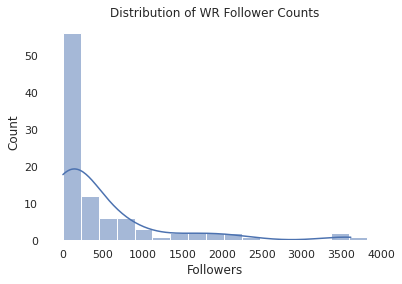

In [150]:
# Distribution of follower counts
sns.histplot(data = df, x = 'Followers', bins = 17, binwidth = 225, kde = True).set(title = "Distribution of WR Follower Counts")
sns.despine(left = True, bottom = True)

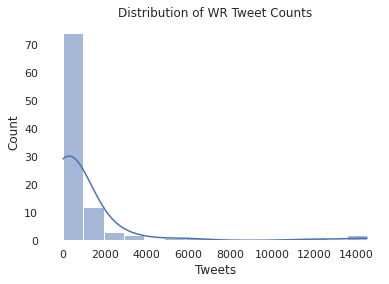

In [154]:
# Distribution of tweet counts
sns.histplot(data = df, x = 'Tweets', bins = 15, kde = True).set(title = "Distribution of WR Tweet Counts")
sns.despine(left = True, bottom = True)

Follower and tweet count distributions are heavily right skewed (majority of values are low, lots of high outliers).

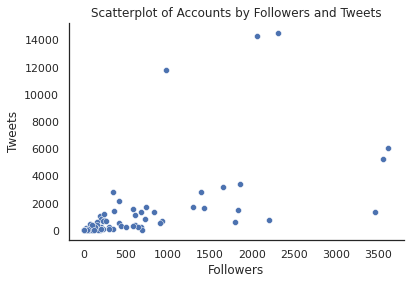

In [161]:
sns.scatterplot(data = df, x = "Followers", y = "Tweets").set(title = "Scatterplot of Accounts by Followers and Tweets")
sns.despine()

Most accounts are inactive with low followers and tweets, there are only a few active accounts. Ideally, accounts should have high followers, and a proprotionately high tweet count.

In [16]:
# Separating by region
wpro = df[df['Region'] == "WPRO"]
searo = df[df['Region'] == "SEARO"]
emro = df[df['Region'] == "EMRO"]
paho = df[df['Region'] == "PAHO"]
afro = df[df['Region'] == "AFRO"]
euro = df[df['Region'] == "EURO"]

regions = [wpro, searo, emro, paho, afro, euro]

Calculating summary statistics for follower counts by region

In [17]:
wpro['Followers'].describe()

count      10.000000
mean      856.000000
std      1042.319529
min        91.000000
25%       133.250000
50%       479.500000
75%      1202.500000
max      3460.000000
Name: Followers, dtype: float64

In [18]:
wpro['Tweets'].describe()

count      10.000000
mean      845.400000
std       687.456698
min         8.000000
25%       179.500000
50%       885.500000
75%      1416.000000
max      1750.000000
Name: Tweets, dtype: float64

In [19]:
searo['Followers'].describe()

count       3.000000
mean     1149.666667
std       834.170446
min       416.000000
25%       696.000000
50%       976.000000
75%      1516.500000
max      2057.000000
Name: Followers, dtype: float64

In [20]:
searo['Tweets'].describe()

count        3.000000
mean      8886.000000
std       7328.491864
min        550.000000
25%       6171.500000
50%      11793.000000
75%      13054.000000
max      14315.000000
Name: Tweets, dtype: float64

In [21]:
emro['Followers'].describe()

count      11.000000
mean      823.727273
std       721.389089
min        49.000000
25%       178.000000
50%       680.000000
75%      1528.000000
max      1855.000000
Name: Followers, dtype: float64

In [22]:
emro['Tweets'].describe()

count      11.000000
mean     1424.454545
std      1306.305735
min        10.000000
25%       154.500000
50%      1372.000000
75%      2495.500000
max      3442.000000
Name: Tweets, dtype: float64

In [23]:
paho['Followers'].describe()

count      13.000000
mean      654.000000
std      1087.934128
min         8.000000
25%        17.000000
50%       153.000000
75%       609.000000
max      3618.000000
Name: Followers, dtype: float64

In [24]:
paho['Tweets'].describe()

count       13.000000
mean      2014.461538
std       4112.593922
min          0.000000
25%          1.000000
50%        249.000000
75%       1566.000000
max      14541.000000
Name: Tweets, dtype: float64

In [25]:
afro['Followers'].describe()

count      39.000000
mean      374.974359
std       701.102571
min         3.000000
25%        21.500000
50%       144.000000
75%       324.500000
max      3551.000000
Name: Followers, dtype: float64

In [26]:
afro['Tweets'].describe()

count      39.000000
mean      329.282051
std       854.203259
min         0.000000
25%         4.500000
50%       100.000000
75%       279.000000
max      5234.000000
Name: Tweets, dtype: float64

In [27]:
euro['Followers'].describe()

count     20.000000
mean     161.850000
std      199.281677
min        0.000000
25%       22.000000
50%       93.500000
75%      234.500000
max      731.000000
Name: Followers, dtype: float64

In [28]:
euro['Tweets'].describe()

count      20.000000
mean      388.350000
std       672.929282
min         0.000000
25%         4.500000
50%       102.500000
75%       457.500000
max      2841.000000
Name: Tweets, dtype: float64

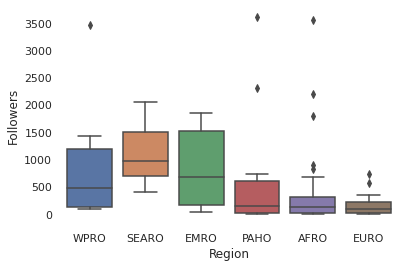

In [220]:
sns.boxplot(x = 'Region', y = 'Followers', data = df)
sns.despine(left = True, bottom = True)
plt.show()

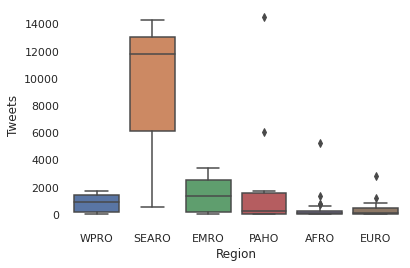

In [221]:
sns.boxplot(x = 'Region', y = 'Tweets', data = df)
sns.despine(left = True, bottom = True)
plt.show()

Regions typically have low followers/tweets, but high outliers skew the distribution and average values (display impressions of better average values).

Region with highest proportion of accounts - AFRO

Region with most active accounts - EMRO

Categorizing significant accounts --

1.   Greater than 1000 followers
2.   Greater than 2000 tweets (including retweets)

In [29]:
# Finding accounts that meet criteria
f1000 = len(df[df['Followers'] >= 1000])
t2000 = len(df[df['Tweets'] >= 2000])
print("Number of accounts with greater than 1000 followers:", f1000, ", Number of accounts with greater than 2000 tweets:", t2000)

# Total number of significant accounts
print("Total number of significant accounts:", len(df[(df['Tweets'] >= 2000) & (df['Followers'] >= 1000)]))

# Returning percentage of significant accounts
print("Percentage of significant accounts:", np.mean(np.array((df['Followers'] >= 1000) & (df['Tweets'] >= 2000))))

Number of accounts with greater than 1000 followers: 13 , Number of accounts with greater than 2000 tweets: 10
Total number of significant accounts: 7
Percentage of significant accounts: 0.07291666666666667


In [30]:
# Returing significant accounts by region
acc = []
for region in regions:
  acc.append(len(region[(region['Tweets'] >= 2000) & (region['Followers'] >= 1000)]))
acc

[0, 1, 3, 2, 1, 0]

### Network Analysis

The top users from each region (most followers and tweets) will be analyzed in depth.

In [199]:
top_users = ["DrLiAilan", "PandavRajesh", "DrAhmedZouiten", "ginatambini", "tegegny", "DrRockenschaub"]
dftop = df[df['screen_name'].isin(top_users)]
dftop

,screen_name,Rep,Country,Region,Followers,Tweets,Retweets,PercentRT,PercentH
0,DrLiAilan,Dr Ailan Li,Cambodia,WPRO,3460,1332,,,
11,PandavRajesh,Dr Rajesh Pandav,Nepal,SEARO,2057,14315,,,
16,DrAhmedZouiten,Dr Ahmed Zouiten,Iraq,EMRO,1826,1504,,,
28,ginatambini,Dr Gina Tambini,Colombia,PAHO,2308,14541,,,
72,tegegny,Dr Yonas Tegegn Woldemariam,Uganda,AFRO,3551,5234,,,
76,DrRockenschaub,Dr Gerald Rockenschaub,Albania,EURO,731,836,,,


**Analysis for WPRO: Dr. Ailan Li**

In [32]:
# Setting tweet data parameters
wpro_tweets = []
wpro_time = []
wpro_likes = []
wpro_retweets = []

In [33]:
for i in tweepy.Cursor(api.user_timeline, id = top_users[0], tweet_mode = "extended", count = 200).items(1000):
    wpro_tweets.append(i.full_text)
    wpro_time.append(i.created_at)
    wpro_likes.append(i.favorite_count)
    wpro_retweets.append(i.retweet_count)

In [34]:
# Creating tweet dataframe
DrLiAilan = pd.DataFrame({'tweets': wpro_tweets, 'time': wpro_time, 'likes': wpro_likes, 'retweets': wpro_retweets})
DrLiAilan

,tweets,time,likes,retweets
0,"RT @WHOWPRO: Ms Sar Lyna is a midwife in 🇰🇭. ""...",2022-05-13 04:18:54,0,3
1,RT @WHOWPRO: Thank you to nurses everywhere! \...,2022-05-13 04:18:06,0,102
2,"RT @WHOWPRO: Are you a community leader, teach...",2022-05-13 04:17:30,0,6
3,Nurses and midwives are central to Primary Hea...,2022-05-12 15:30:11,11,2
4,Thank you Ms. Sar Lyna for telling us your ama...,2022-05-12 15:02:28,1,0
...,...,...,...,...
995,RT @UNCambodia: What would you advise the UN S...,2020-07-04 01:09:54,0,5
996,Individual heathy and safe choices can help ke...,2020-07-02 15:50:03,5,4
997,Health workers in #Cambodia continue to vaccin...,2020-07-01 14:14:25,9,3
998,"During the #COVID-19 pandemic, it is more impo...",2020-06-30 03:05:19,2,2


In [35]:
# Retweet count
retweets = []
count = 0
for i in DrLiAilan['tweets']:
  if "RT" in i:
    count += 1
retweets.append(count)

Filtering follower network by health-related accounts (by name & bio).

In [36]:
wpro_followers_screen_names = []
for i in tweepy.Cursor(api.followers, screen_name = "DrLiAilan", count = 200).items(100):
   wpro_followers_screen_names.append(i.screen_name)

In [37]:
wpro_followers_bio = []
for name in wpro_followers_screen_names:
   u = api.get_user(name)
   wpro_followers_bio.append(u.description)

In [38]:
wpro_follower_details = pd.DataFrame({'Follower Screen Name': wpro_followers_screen_names, 'Bio Description': wpro_followers_bio})
wpro_follower_details

,Follower Screen Name,Bio Description
0,ChivantV,ខ្ញុំប្រើគ្រាន់តែដើម្បីតាមដានព័ត៌មានសង្គម
1,SeakHyChay,"Administrative Analyst, UNDP Cambodia"
2,Joseph24210516,Joseph
3,ChumSeangheng,
4,EkMaryna,
...,...,...
95,maguedmakram,#GlobalHealthProgramming @fhi360 #HealthGovern...
96,KimVandy3,
97,AndrewsAwuah4,Excoba
98,ChouPhallyka,


In [39]:
# Filtering by name
wpro_df1 = wpro_follower_details.loc[wpro_follower_details['Follower Screen Name'].str.contains("WHO|who|Health|health|Medical|medical|Medicine|medicine|COVID|COVID19|covid", case =True)]

In [40]:
wpro_df1

,Follower Screen Name,Bio Description


In [41]:
# Filtering by bio
wpro_df2 = wpro_follower_details.loc[wpro_follower_details['Bio Description'].str.contains("WHO|Health|health|Medical|medical|Medicine|medicine|COVID|COVID19|covid19|covid", case = True)]

In [42]:
wpro_df2

,Follower Screen Name,Bio Description
15,CApeyusi,God is the Scientist. \nGrace is the Catalys...
67,mbonyinshutier5,Don't stop until you're proud📍🇷🇼\nMedical stud...
95,maguedmakram,#GlobalHealthProgramming @fhi360 #HealthGovern...


In [43]:
wpro_frames = [wpro_df1, wpro_df2]
wpro_followers_realted_to_health = pd.concat(wpro_frames).drop_duplicates()

In [44]:
wpro_followers_realted_to_health

,Follower Screen Name,Bio Description
15,CApeyusi,God is the Scientist. \nGrace is the Catalys...
67,mbonyinshutier5,Don't stop until you're proud📍🇷🇼\nMedical stud...
95,maguedmakram,#GlobalHealthProgramming @fhi360 #HealthGovern...


In [45]:
number = len(wpro_followers_realted_to_health.index)

In [46]:
# Return number of health-related followers
print("The WPRO: Dr. Ailan Li has", number, "followers who work for health organizations.")

The WPRO: Dr. Ailan Li has 3 followers who work for health organisations.


**Analysis for SEARO: Dr. Rajesh Pandav**

In [47]:
searo_tweets = []
searo_time = []
searo_likes = []
searo_retweets = []

In [48]:
for i in tweepy.Cursor(api.user_timeline, id = top_users[1], tweet_mode = "extended", count = 200).items(1000):
    searo_tweets.append(i.full_text)
    searo_time.append(i.created_at)
    searo_likes.append(i.favorite_count)
    searo_retweets.append(i.retweet_count)

In [49]:
PandavRajesh = pd.DataFrame({'tweets': searo_tweets, 'time': searo_time, 'likes': searo_likes, 'retweets': searo_retweets})
PandavRajesh

,tweets,time,likes,retweets
0,RT @arajouria: Congratulations Priti on your s...,2022-05-13 06:30:50,0,3
1,RT @WHO: Nurses are critical health workers.\n...,2022-05-13 00:06:36,0,57
2,"RT @DrTedros: On #InternationalNursesDay, we m...",2022-05-13 00:06:30,0,184
3,RT @WHOWPRO: Thank you to nurses everywhere! \...,2022-05-13 00:06:15,0,102
4,RT @WHO: Big Tobacco poisons our oceans:\n👎 be...,2022-05-13 00:06:09,0,54
...,...,...,...,...
995,RT @WHOSEARO: #DoItAll is the best gift 🎁 you ...,2021-12-26 01:22:46,0,8
996,RT @WHOSEARO: We salute and thank all healthca...,2021-12-26 01:22:41,0,21
997,"RT @WHO: ""When we say #healthworkers are prior...",2021-12-26 01:21:52,0,239
998,RT @WHO: UPDATED: Technical Brief &amp; Priori...,2021-12-24 15:08:11,0,107


In [50]:
# Retweet count
count = 0
for i in PandavRajesh['tweets']:
  if "RT" in i:
    count += 1
retweets.append(count)

Filtering follower network by health-related accounts (by name & bio).

In [51]:
searo_followers_screen_names = []
for i in tweepy.Cursor(api.followers, screen_name = "PandavRajesh", count = 200).items(100):
   searo_followers_screen_names.append(i.screen_name)

In [52]:
searo_followers_bio = []
for name in searo_followers_screen_names:
   u = api.get_user(name)
   searo_followers_bio.append(u.description)

In [53]:
searo_follower_details = pd.DataFrame({'Follower Screen Name': searo_followers_screen_names, 'Bio Description': searo_followers_bio})
searo_follower_details

,Follower Screen Name,Bio Description
0,O_owassa_n,Diplomat Congolais
1,Tsering90806361,Ex Student @nepal institute of health sciences
2,lal_muk2,Leaders Take Decision People Need Emotional Re...
3,AnarfiAsamoa,
4,UsfbullI,Proud boy mom & USF alum x2. Asst Prof. Lover ...
...,...,...
95,Nabin_Ktm,सिक्दै गरेको मान्छे
96,KangJing,"Assistant Professor JNU, Delhi I Host n Founde..."
97,jamessudeep1,Doctor by profession💉💊 investor/trader in shar...
98,BhnadariBishnuK,Everywhere Everything !!


In [54]:
searo_df1 = searo_follower_details.loc[searo_follower_details['Follower Screen Name'].str.contains("WHO|who|Health|health|Medical|medical|Medicine|medicine|COVID|COVID19|covid", case = True)]

In [55]:
searo_df1

,Follower Screen Name,Bio Description
21,MartaSeoaneWHO,External Relations Officer at the World Health...


In [56]:
searo_df2 = searo_follower_details.loc[searo_follower_details['Bio Description'].str.contains("WHO|Health|health|Medical|medical|Medicine|medicine|COVID|COVID19|covid19|covid", case = True)]

In [57]:
searo_df2

,Follower Screen Name,Bio Description
1,Tsering90806361,Ex Student @nepal institute of health sciences
6,poonam__k,"Public Health, Gender Studies, Researcher, Bin..."
11,ginamaramag,Communications @WHO Geneva
13,Sandhya_51,"Nurse, Public Health Professional, Traveller, ..."
19,GyawaliPrakash,"Dr. Prakash Gyawali\r\nB.A.M.S.,https://t.co/T..."
21,MartaSeoaneWHO,External Relations Officer at the World Health...
24,samirkumara,"Chief, Health Emergency Operation Center\nJoin..."
32,sapanabasnet,PhD | Social Scientist | @Sightsavers Research...
33,federalisation,Nepal Federal Health System Research Project b...
37,anasophlambrou,infectious disease epi | 🦠🧬 surveillance | glo...


In [58]:
searo_frames = [searo_df1, searo_df2]
searo_followers_realted_to_health = pd.concat(searo_frames).drop_duplicates()

In [59]:
searo_followers_realted_to_health

,Follower Screen Name,Bio Description
21,MartaSeoaneWHO,External Relations Officer at the World Health...
1,Tsering90806361,Ex Student @nepal institute of health sciences
6,poonam__k,"Public Health, Gender Studies, Researcher, Bin..."
11,ginamaramag,Communications @WHO Geneva
13,Sandhya_51,"Nurse, Public Health Professional, Traveller, ..."
19,GyawaliPrakash,"Dr. Prakash Gyawali\r\nB.A.M.S.,https://t.co/T..."
24,samirkumara,"Chief, Health Emergency Operation Center\nJoin..."
32,sapanabasnet,PhD | Social Scientist | @Sightsavers Research...
33,federalisation,Nepal Federal Health System Research Project b...
37,anasophlambrou,infectious disease epi | 🦠🧬 surveillance | glo...


In [60]:
number1 = len(searo_followers_realted_to_health.index)

In [61]:
print("The SEARO: Dr. Rajesh Pandav has", number1, "followers who work for health organizations.")

The SEARO: Dr. Rajesh Pandav has 19 followers who work for health organisations.


**Analysis for EMRO: Dr.Ahmed Zouiten** 

In [62]:
emro_tweets = []
emro_time = []
emro_likes = []
emro_retweets = []

In [63]:
for i in tweepy.Cursor(api.user_timeline, id = top_users[2], tweet_mode = "extended", count = 200).items(1000):
    emro_tweets.append(i.full_text)
    emro_time.append(i.created_at)
    emro_likes.append(i.favorite_count)
    emro_retweets.append(i.retweet_count)

In [64]:
DrAhmedZouiten = pd.DataFrame({'tweets': emro_tweets, 'time': emro_time, 'likes': emro_likes, 'retweets': emro_retweets})
DrAhmedZouiten

,tweets,time,likes,retweets
0,RT @WHOIraq: WHO &amp; @MOHealth_Iraq work to ...,2022-05-13 17:06:29,0,3
1,RT @WHOIraq: 📽️ شاهد رسالة ممثل منظمة الصحة ال...,2022-05-12 18:17:22,0,1
2,"Since I started working in the health sector, ...",2022-05-12 17:24:08,22,7
3,Honored to meet with the Iraqi Minister of Env...,2022-05-12 13:53:54,15,3
4,RT @WHOIraq: اليوم هو #اليوم_العالمي_للتمريض.\...,2022-05-12 12:31:43,0,3
...,...,...,...,...
995,"Le thé, boisson la plus consommée au 🌍 après l...",2020-05-22 10:47:22,22,2
996,RT @OMS_Afrique: L'OMS soutient #Madagascar et...,2020-05-21 18:30:12,0,14
997,RT @EU_UNGeneva: #WHA73 adopted the EU-led COV...,2020-05-19 16:30:25,0,131
998,RT @WHOEMRO: What is @WHO doing to fight #COVI...,2020-05-18 18:06:35,0,5


In [65]:
# Retweet count
count = 0
for i in DrAhmedZouiten['tweets']:
  if "RT" in i:
    count += 1
retweets.append(count)

Filtering follower network by health-related accounts (by name & bio).

In [66]:
emro_followers_screen_names = []
for i in tweepy.Cursor(api.followers, screen_name = "DrAhmedZouiten", count = 200).items(100):
   emro_followers_screen_names.append(i.screen_name)

In [67]:
emro_followers_bio = []
for name in emro_followers_screen_names:
   u = api.get_user(name)
   emro_followers_bio.append(u.description)

In [68]:
emro_follower_details = pd.DataFrame({'Follower Screen Name': emro_followers_screen_names, 'Bio Description': emro_followers_bio})
emro_follower_details

,Follower Screen Name,Bio Description
0,Wdekanter,Chest physician connected to AvL/NKI preventio...
1,BathishNisreen,Communications Consultant @ILO. Previously @Re...
2,Salim_Haseeb,
3,clickshafiq,
4,MAHDIHAYIR,
...,...,...
95,DahabAglanGold,الملتفت لا يصل
96,eliahmadnezhad,AssociatProf.; Epidemiologist (MD). Secretaria...
97,OdayJabery,إعلامي
98,Abdoul31475457,


In [69]:
emro_df1 = emro_follower_details.loc[emro_follower_details['Follower Screen Name'].str.contains("WHO|who|Health|health|Medical|medical|Medicine|medicine|COVID|COVID19|covid", case = True)]

In [70]:
emro_df1

,Follower Screen Name,Bio Description
91,exemplarshealth,We provide evidence-based insights from positi...


In [71]:
emro_df2 = emro_follower_details.loc[emro_follower_details['Bio Description'].str.contains("WHO|Health|health|Medical|medical|Medicine|medicine|COVID|COVID19|covid19|covid", case = True)]

In [72]:
emro_df2

,Follower Screen Name,Bio Description
6,DrRanaHajjeh,"“Health for All by All” is our Goal. Director,..."
11,Frank_Pega,"@WHO Technical Officer - Environment, Climate ..."
17,CROWRDREAM,Disability Rights Activist \n#HighRiskCOVID19 ...
20,AlraibyJamela,New Account. #WHO Representative to Jordan 🇯🇴 ...
29,drahmedalaraji,Doctor Of Medicine (https://t.co/MwyCy86Hty.B)...
41,nasrps,Global Health and development (national health...
54,rayana00949910,Pediatrician and public health professional
58,dr_habasha,"MBChB 🇮🇶, Master & PhD Public Health (Nutritio..."
60,DanaaIt,AMR scientist. 👩🏻‍🔬🔬🧫 | WHO_EMRO | LSHTM_AMR |...
63,DrJJabbour,"WHO Representative of Oman, Public Health Prac..."


In [73]:
emro_frames = [emro_df1, emro_df2]
emro_followers_realted_to_health = pd.concat(emro_frames).drop_duplicates()

In [74]:
emro_followers_realted_to_health

,Follower Screen Name,Bio Description
91,exemplarshealth,We provide evidence-based insights from positi...
6,DrRanaHajjeh,"“Health for All by All” is our Goal. Director,..."
11,Frank_Pega,"@WHO Technical Officer - Environment, Climate ..."
17,CROWRDREAM,Disability Rights Activist \n#HighRiskCOVID19 ...
20,AlraibyJamela,New Account. #WHO Representative to Jordan 🇯🇴 ...
29,drahmedalaraji,Doctor Of Medicine (https://t.co/MwyCy86Hty.B)...
41,nasrps,Global Health and development (national health...
54,rayana00949910,Pediatrician and public health professional
58,dr_habasha,"MBChB 🇮🇶, Master & PhD Public Health (Nutritio..."
60,DanaaIt,AMR scientist. 👩🏻‍🔬🔬🧫 | WHO_EMRO | LSHTM_AMR |...


In [75]:
number2 = len(emro_followers_realted_to_health.index)

In [76]:
print("The EMRO: Dr. Ahmed Zouiten has", number2, "followers who work for health organizations.")

The EMRO: Dr. Ahmed Zouiten has 18 followers who work for health organisations.


**Analysis for PAHO: Dr. Gina Tambini** 

In [77]:
paho_tweets = []
paho_time = []
paho_likes = []
paho_retweets = []

In [78]:
for i in tweepy.Cursor(api.user_timeline, id = top_users[3], tweet_mode = "extended", count = 200).items(1000):
    paho_tweets.append(i.full_text)
    paho_time.append(i.created_at)
    paho_likes.append(i.favorite_count)
    paho_retweets.append(i.retweet_count)

In [79]:
GinaTambini = pd.DataFrame({'tweets': paho_tweets, 'time': paho_time, 'likes': paho_likes, 'retweets': paho_retweets})
GinaTambini

,tweets,time,likes,retweets
0,RT @OPSOMS_Col: La Región de las Américas 🌎 en...,2022-05-12 13:41:05,0,2
1,"RT @opsoms: En la Amazonía, comunidades indíge...",2022-05-12 04:20:34,0,23
2,RT @Pontifex_es: Una parte de la vocación de l...,2022-05-12 04:20:17,0,1944
3,RT @superaelcancer: Desde la @URosario se lanz...,2022-05-12 04:19:59,0,3
4,RT @OPSOMS_Col: Para ponerle fin a la epidemia...,2022-05-12 04:19:27,0,5
...,...,...,...,...
995,RT @OPSOMS_Col: #EnVivo. El Doctor Venkatraman...,2021-09-22 19:29:13,0,3
996,RT @UNFPAColombia: 🔴#EnVivo junto a @MinSaludC...,2021-09-22 19:08:33,0,4
997,"RT @UNFPAColombia: Participan @OPSOMS_Col, @UN...",2021-09-22 19:08:29,0,4
998,RT @Fruizgomez: Confirmado por Janssen arribo ...,2021-09-22 19:08:13,0,690


In [80]:
# Retweet count
count = 0
for i in GinaTambini['tweets']:
  if "RT" in i:
    count += 1
retweets.append(count)

Filtering follower network by health-related accounts (by name & bio).

In [81]:
paho_followers_screen_names = []
for i in tweepy.Cursor(api.followers, screen_name = "GinaTambini", count = 200).items(100):
   paho_followers_screen_names.append(i.screen_name)

In [82]:
paho_followers_bio = []
for name in paho_followers_screen_names:
   u = api.get_user(name)
   paho_followers_bio.append(u.description)

In [83]:
paho_follower_details = pd.DataFrame({'Follower Screen Name': paho_followers_screen_names, 'Bio Description': paho_followers_bio})
paho_follower_details

,Follower Screen Name,Bio Description
0,dires04,-Opiniones personales-
1,afelipealdana,
2,CROWRDREAM,Disability Rights Activist \n#HighRiskCOVID19 ...
3,nancyvasconez1,
4,Marianx323,
...,...,...
95,StefAngeleri,"#MSCA fellow @qubschooloflaw, @IrishCentreHR P..."
96,LaOtraCaraCN,Programa de opinión. Entrevistas con @AnitaVel...
97,SGuerreroB,"Barranquillerísima y juniorista, corresponsal ..."
98,TeameMahari,tgiray


In [84]:
paho_df1 = paho_follower_details.loc[paho_follower_details['Follower Screen Name'].str.contains("WHO|who|Health|health|Medical|medical|Medicine|medicine|COVID|COVID19|covid", case = True)]

In [85]:
paho_df1

,Follower Screen Name,Bio Description


In [86]:
paho_df2 = paho_follower_details.loc[paho_follower_details['Bio Description'].str.contains("WHO|Health|health|Medical|medical|Medicine|medicine|COVID|COVID19|covid19|covid", case = True)]

In [87]:
paho_df2

,Follower Screen Name,Bio Description
2,CROWRDREAM,Disability Rights Activist \n#HighRiskCOVID19 ...
8,jennyeord,PhD Population Health Sciences @EdinburghUni @...
14,KerguelenCarlos,Médico. MA Health Management Planning and Poli...
18,arantxata,Pasión y vocación por la comunicación y la sal...
26,matiasirad,MD MPH @HarvardHSPH Regional Advisor #MentalHe...
31,LHSSproject,USAID’s Local Health System Sustainability Pro...
35,GloriaCordoba,Pasionate about strengthening research capacit...
44,fonse_seb,"MD @UniJaveriana, MA PPEofHealth @UCL. PhD Glo..."
54,JoseUsmeCiro,"Biologist, MSc, PhD Biology (Molecular Virolog..."
68,anpapri,"Technical Coordinator, World Health Organizati..."


In [88]:
paho_frames = [paho_df1, paho_df2]
paho_followers_realted_to_health = pd.concat(paho_frames).drop_duplicates()

In [89]:
paho_followers_realted_to_health

,Follower Screen Name,Bio Description
2,CROWRDREAM,Disability Rights Activist \n#HighRiskCOVID19 ...
8,jennyeord,PhD Population Health Sciences @EdinburghUni @...
14,KerguelenCarlos,Médico. MA Health Management Planning and Poli...
18,arantxata,Pasión y vocación por la comunicación y la sal...
26,matiasirad,MD MPH @HarvardHSPH Regional Advisor #MentalHe...
31,LHSSproject,USAID’s Local Health System Sustainability Pro...
35,GloriaCordoba,Pasionate about strengthening research capacit...
44,fonse_seb,"MD @UniJaveriana, MA PPEofHealth @UCL. PhD Glo..."
54,JoseUsmeCiro,"Biologist, MSc, PhD Biology (Molecular Virolog..."
68,anpapri,"Technical Coordinator, World Health Organizati..."


In [90]:
number3 = len(paho_followers_realted_to_health.index)

In [91]:
print("The PAHO: Dr. Gina Tambini has", number3, "followers who work for health organizations.")

The PAHO: Dr. Gina Tambini has 12 followers who work for health organisations.


**Analysis for AFRO: Dr Yonas Tegegn Woldemariam** 

In [92]:
afro_tweets = []
afro_time = []
afro_likes = []
afro_retweets = []

In [93]:
for i in tweepy.Cursor(api.user_timeline, id = top_users[4], tweet_mode = "extended", count = 200).items(1000):
    afro_tweets.append(i.full_text)
    afro_time.append(i.created_at)
    afro_likes.append(i.favorite_count)
    afro_retweets.append(i.retweet_count)

In [94]:
tegegny = pd.DataFrame({'tweets': afro_tweets, 'time': afro_time, 'likes': afro_likes, 'retweets': afro_retweets})
tegegny

,tweets,time,likes,retweets
0,RT @EA_DevCouncil: የወልቃት ኮሚቴ አዲስ የክተት አዋጅ! The...,2022-05-13 16:33:00,0,32
1,Science in 5: Vaccines and children\nWhat is W...,2022-05-13 16:31:40,1,0
2,"RT @yared_lb: For centuries, Welkait has been ...",2022-05-12 14:50:06,0,62
3,RT @Ephrem1411: There are 11.6 million Amhara ...,2022-05-12 14:49:45,0,24
4,RT @Valeria_Timofey: Historical evidence prove...,2022-05-12 14:48:30,0,8
...,...,...,...,...
995,RT @MinofHealthUG: Results from COVID-19 tests...,2020-09-12 17:47:33,0,150
996,RT @MinofHealthUG: .@JaneRuth_Aceng: \n-Instit...,2020-09-11 14:46:20,0,1
997,RT @MinofHealthUG: .@JaneRuth_Aceng: \nSteps t...,2020-09-11 14:46:18,0,1
998,RT @MinofHealthUG: .@JaneRuth_Aceng: A total o...,2020-09-11 14:46:15,0,3


In [95]:
# Retweet count
count = 0
for i in tegegny['tweets']:
  if "RT" in i:
    count += 1
retweets.append(count)

Filtering follower network by health-related accounts (by name & bio).

In [96]:
afro_followers_screen_names = []
for i in tweepy.Cursor(api.followers, screen_name = "tegegny", count = 200).items(100):
   afro_followers_screen_names.append(i.screen_name)

In [97]:
afro_followers_bio = []
for name in afro_followers_screen_names:
   u = api.get_user(name)
   afro_followers_bio.append(u.description)

In [98]:
afro_follower_details = pd.DataFrame({'Follower Screen Name': afro_followers_screen_names, 'Bio Description': afro_followers_bio})
afro_follower_details

,Follower Screen Name,Bio Description
0,brains_tbc,"We are tax consultants, we offer the following..."
1,cmim2021,This is an umbrella of all ministries at UCC B...
2,NakatoHon,The woman Member of Parliament for Buyende dis...
3,RichNig67587252,You can change nothing in me
4,Dr_Concon,🌟Child and adolescent health enthusiast @Watot...
...,...,...
95,fridaym355,Graphics Designer
96,hopestreamcares,"Health Services for Individuals, Families & In..."
97,THINKTW88894444,Mindful
98,immanuela_m,Power Engineer Consultant ~ wa/me+256705035861


In [99]:
afro_df1 = afro_follower_details.loc[afro_follower_details['Follower Screen Name'].str.contains("WHO|who|Health|health|Medical|medical|Medicine|medicine|COVID|COVID19|covid", case = True)]

In [100]:
afro_df1

,Follower Screen Name,Bio Description
64,exper_medical,"Medical Equipment Experts (sales, repair, serv..."
91,Health1Haven,A specialist Children's Clinic and general Lab...


In [101]:
afro_df2 = afro_follower_details.loc[afro_follower_details['Bio Description'].str.contains("WHO|Health|health|Medical|medical|Medicine|medicine|COVID|COVID19|covid19|covid", case = True)]

In [102]:
afro_df2

,Follower Screen Name,Bio Description
4,Dr_Concon,🌟Child and adolescent health enthusiast @Watot...
7,GODFREYKATEREG5,A dedicated medical and social scientist inter...
8,twogere,Building capacities of young people with lived...
9,hey_uganda,Strengthening Reproductive Health & Menstrual ...
10,irenemutumba15,"A mother, wife with passion to health promotio..."
15,OkoroaforSunnyC,a selfless development worker striving to impr...
17,EmmanetN,Life is Easy when you believe....Just Trust th...
21,OkwirKenn,"I understand my value,am not discourage by cri..."
25,JaquayMeg,My passions push me to be better... Healthy fo...
38,townson_cocke,Public Health @UW. Contributor @thedaily. \n\n...


In [103]:
afro_frames = [afro_df1, afro_df2]
afro_followers_realted_to_health = pd.concat(afro_frames).drop_duplicates()

In [104]:
afro_followers_realted_to_health

,Follower Screen Name,Bio Description
64,exper_medical,"Medical Equipment Experts (sales, repair, serv..."
91,Health1Haven,A specialist Children's Clinic and general Lab...
4,Dr_Concon,🌟Child and adolescent health enthusiast @Watot...
7,GODFREYKATEREG5,A dedicated medical and social scientist inter...
8,twogere,Building capacities of young people with lived...
9,hey_uganda,Strengthening Reproductive Health & Menstrual ...
10,irenemutumba15,"A mother, wife with passion to health promotio..."
15,OkoroaforSunnyC,a selfless development worker striving to impr...
17,EmmanetN,Life is Easy when you believe....Just Trust th...
21,OkwirKenn,"I understand my value,am not discourage by cri..."


In [105]:
number4 = len(afro_followers_realted_to_health.index)

In [106]:
print("The AFRO: Dr.Yonas Tegegn Woldemariam has", number4, "followers who work for health organizations.")

The AFRO: Dr.Yonas Tegegn Woldemariam has 18 followers who work for health organisations.


**Analysis for EURO: Dr Gerald Rockenschaub** 

In [107]:
euro_tweets = []
euro_time = []
euro_likes = []
euro_retweets = []

In [108]:
for i in tweepy.Cursor(api.user_timeline, id = top_users[5], tweet_mode = "extended", count = 200).items(1000):
    euro_tweets.append(i.full_text)
    euro_time.append(i.created_at)
    euro_likes.append(i.favorite_count)
    euro_retweets.append(i.retweet_count)

In [109]:
DrRockenschaub = pd.DataFrame({'tweets': euro_tweets, 'time': euro_time, 'likes': euro_likes, 'retweets': euro_retweets})
DrRockenschaub

,tweets,time,likes,retweets
0,"RT @UN: On Thursday, the Human Rights Council ...",2022-05-12 12:43:18,0,100
1,RT @vanderbellen: Pleased to meet @WHO Directo...,2022-05-12 12:37:26,0,79
2,RT @UN_News_Centre: The @UN remains intensely ...,2022-05-12 08:11:03,0,8
3,"RT @Gawhary: Um in Österreich zu verstehen, we...",2022-05-12 08:10:47,0,134
4,RT @AJEnglish: Veteran Al Jazeera journalist S...,2022-05-12 08:09:24,0,883
...,...,...,...,...
831,RT @WHOEMRO: On the occasion of #WorldAIDSDay ...,2018-11-30 12:05:14,0,22
832,"In #Gaza, WHO, with funding from @eu_echo, sup...",2018-11-30 11:51:37,10,4
833,Health workers and health facilities are #NotA...,2018-11-23 08:34:39,2,1
834,RT @PKraehenbuehl: After months of a remarkabl...,2018-11-23 07:49:23,0,110


In [110]:
# Retweet count
count = 0
for i in DrRockenschaub['tweets']:
  if "RT" in i:
    count += 1
retweets.append(count)

Filtering follower network by health-related accounts (by name & bio).

In [111]:
euro_followers_screen_names = []
for i in tweepy.Cursor(api.followers, screen_name = "DrRockenschaub", count = 200).items(100):
   euro_followers_screen_names.append(i.screen_name)

In [112]:
euro_followers_bio = []
for name in euro_followers_screen_names:
   u = api.get_user(name)
   euro_followers_bio.append(u.description)

In [113]:
euro_follower_details = pd.DataFrame({'Follower Screen Name': euro_followers_screen_names, 'Bio Description': euro_followers_bio})
euro_follower_details

,Follower Screen Name,Bio Description
0,SarahiUribeG,Asesora de Imagen • Periodista • Conductora de...
1,zofia_kaliszen,"learn to earn money, Don't beg other people fo..."
2,Pierreroca1,Resource Mobilization Adviser @WHO_Europe. Pre...
3,Ecole_Oubliee,groupe des parents pour une école en sécurité ...
4,Lyn60139787,TBA
...,...,...
95,ManfredMader,
96,Vulkan18108254,Was mir wichtig ist Ökologische Landwirtschaft...
97,DripLeary,to plant a seed today is to believe in tomorrow
98,oleschri,Nicht deine Projektionsfläche. 💃 · · · · ...


In [114]:
euro_df1 = euro_follower_details.loc[euro_follower_details['Follower Screen Name'].str.contains("WHO|who|Health|health|Medical|medical|Medicine|medicine|COVID|COVID19|covid", case = True)]

In [115]:
euro_df1

,Follower Screen Name,Bio Description
20,HealthPolicyW,Independent global health policy news by accre...
99,tomwhoknows,🔸Information und Inspiration 🔸 https://t.co/jc...


In [116]:
euro_df2 = euro_follower_details.loc[euro_follower_details['Bio Description'].str.contains("WHO|Health|health|Medical|medical|Medicine|medicine|COVID|COVID19|covid19|covid", case = True)]

In [117]:
euro_df2

,Follower Screen Name,Bio Description
2,Pierreroca1,Resource Mobilization Adviser @WHO_Europe. Pre...
7,elenavovc,"Technical Officer, #HIV #Hepatitis #STIs unit,..."
9,miljana_grbic,WHO Representative🇺🇳 Republic of Moldova. From...
11,gbejtja,"MD, Public Health, Health Policy"
13,IrynaTarnavska,"Communications Officer at @WHOUkraine, previou..."
15,SarahI_Tyler,Communications consultant for good causes @WHO...
16,marisloane,External relations @WHO| President @LSEAAB| Go...
18,hucovienna,"https://t.co/UDcsqcZISf, Health Systems and Hu..."
19,HabichtJarno,"WHO Representative in Ukraine, @WHO and @WHOUk..."
20,HealthPolicyW,Independent global health policy news by accre...


In [118]:
euro_frames = [euro_df1, euro_df2]
euro_followers_realted_to_health = pd.concat(euro_frames).drop_duplicates()

In [119]:
euro_followers_realted_to_health

,Follower Screen Name,Bio Description
20,HealthPolicyW,Independent global health policy news by accre...
99,tomwhoknows,🔸Information und Inspiration 🔸 https://t.co/jc...
2,Pierreroca1,Resource Mobilization Adviser @WHO_Europe. Pre...
7,elenavovc,"Technical Officer, #HIV #Hepatitis #STIs unit,..."
9,miljana_grbic,WHO Representative🇺🇳 Republic of Moldova. From...
11,gbejtja,"MD, Public Health, Health Policy"
13,IrynaTarnavska,"Communications Officer at @WHOUkraine, previou..."
15,SarahI_Tyler,Communications consultant for good causes @WHO...
16,marisloane,External relations @WHO| President @LSEAAB| Go...
18,hucovienna,"https://t.co/UDcsqcZISf, Health Systems and Hu..."


In [120]:
number5 = len(euro_followers_realted_to_health.index)

In [121]:
print("The EURO: Dr Gerald Rockenschaub has", number5, "followers who work for health organizations.")

The EURO: Dr Gerald Rockenschaub has 19 followers who work for health organisations.


**Comparing representative reach**

1. Originality of content - proportion of retweets to original tweets
2. Official public health / medical follower base - proportion of followers from health organizations

In [206]:
dftop['Retweets'] = retweets
dftop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,screen_name,Rep,Country,Region,Followers,Tweets,Retweets,PercentRT,PercentH
0,DrLiAilan,Dr Ailan Li,Cambodia,WPRO,3460,1332,494,0.371708,0.000867
11,PandavRajesh,Dr Rajesh Pandav,Nepal,SEARO,2057,14315,755,0.052746,0.009237
16,DrAhmedZouiten,Dr Ahmed Zouiten,Iraq,EMRO,1826,1504,755,0.502329,0.009858
28,ginatambini,Dr Gina Tambini,Colombia,PAHO,2308,14541,981,0.067464,0.005199
72,tegegny,Dr Yonas Tegegn Woldemariam,Uganda,AFRO,3551,5234,878,0.168005,0.005069
76,DrRockenschaub,Dr Gerald Rockenschaub,Albania,EURO,731,836,757,0.905502,0.025992


In [208]:
# # Creating retweet proportion column
# rtp = []

# # Manually appending values
# rtp.append(494/1329)
# rtp.append(755/14314)
# rtp.append(755/1503)
# rtp.append(981/14541)
# rtp.append(879/5232)
# rtp.append(757/836)

# # Adding column to dataframe
# dftop['PercentRT'] = rtp


# # Creating health followers column
# hprop = []

# # Manually appending values
# hprop.append(3/3460)
# hprop.append(19/2057)
# hprop.append(18/1826)
# hprop.append(12/2308)
# hprop.append(18/3551)
# hprop.append(19/731)

# # Adding column to dataframe
# dftop['PercentH'] = hprop

dftop

,screen_name,Rep,Country,Region,Followers,Tweets,Retweets,PercentRT,PercentH
0,DrLiAilan,Dr Ailan Li,Cambodia,WPRO,3460,1332,494,0.371708,0.000867
11,PandavRajesh,Dr Rajesh Pandav,Nepal,SEARO,2057,14315,755,0.052746,0.009237
16,DrAhmedZouiten,Dr Ahmed Zouiten,Iraq,EMRO,1826,1504,755,0.502329,0.009858
28,ginatambini,Dr Gina Tambini,Colombia,PAHO,2308,14541,981,0.067464,0.005199
72,tegegny,Dr Yonas Tegegn Woldemariam,Uganda,AFRO,3551,5234,878,0.168005,0.005069
76,DrRockenschaub,Dr Gerald Rockenschaub,Albania,EURO,731,836,757,0.905502,0.025992


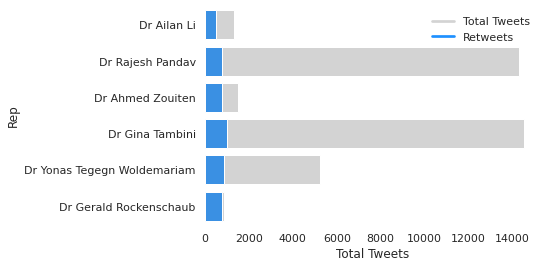

In [209]:
# Creating barplot for tweets/retweets
sns.set(style = "white")
tbar = sns.barplot(x = 'Tweets', y = 'Rep', data = dftop, color = 'lightgrey', orient = 'h')
rtbar = sns.barplot(x = 'Retweets', y = 'Rep', data = dftop, color = 'dodgerblue', orient = 'h')
rtbar.set_xlabel("Total Tweets")
plt.legend(labels = ['Total Tweets', 'Retweets'], loc = "upper right", frameon = False)
leg = rtbar.get_legend()
leg.legendHandles[0].set_color('lightgrey')
leg.legendHandles[1].set_color('dodgerblue')
sns.despine(left = True, bottom = True)


Representative Dr Rajesh Pandav and Dr Gina Tambini have a high proportion of original tweets to retweets, meaning they are actively posting original content.

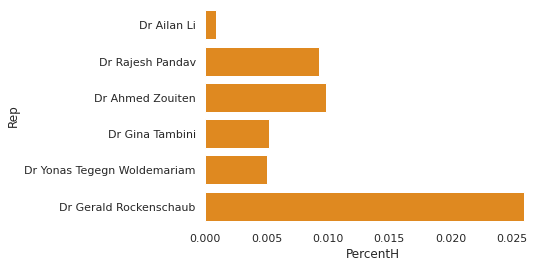

In [216]:
# Creating barplot for health-related followers
sns.set(style = "white")
tbar = sns.barplot(x = 'PercentH', y = 'Rep', data = dftop, color = 'darkorange', orient = "h")
sns.despine(left = True, bottom = True)

Overall official health-related accounts in the follower base of the top representative accounts are all proportionately low, which is good, since it shows that they are networking outside the immediate public health circles. 

However, this data is not completely representative of the true proportion, since these are only accounts with the tags in the name/bio and in english. Regardless, it is much more difficult to officially verify all the accounts.